<a href="https://colab.research.google.com/github/samirsaraiva/tcc_puc/blob/main/TCC_DataScience_Samir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Carregando dados

##Carregando dadods de inflação
Dados obtidos através da plataforma do IBGE na tabela 1737 do Sistema IBGE de Recuperação Automática (SIDRA), disponível no endereço abaixo:
https://sidra.ibge.gov.br/tabela/1737

In [53]:
ipca = pd.read_csv("https://raw.githubusercontent.com/samirsaraiva/tcc_puc/main/indice_inflacao.csv")

In [54]:
ipca.head()

,Date,Num-indice-inflacao
0,1979-12-01,0.0
1,1980-01-01,0.0
2,1980-02-01,0.0
3,1980-03-01,0.0
4,1980-04-01,0.0


In [55]:
ipca['Date'] = ipca['Date'].astype('datetime64[ns]')
ipca = ipca.set_index('Date')
ipca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 513 entries, 1979-12-01 to 2022-08-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Num-indice-inflacao  513 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


In [56]:
#Corrigindo a timezone do Index do Dataset, para que seja melhor de trabalhar com os dados que serão
#importados através da API do Yahoo Finance
ipca = ipca.tz_localize(tz='America/Sao_Paulo')

In [57]:
ipca.head()

,Num-indice-inflacao
Date,
1979-12-01 00:00:00-03:00,0.0
1980-01-01 00:00:00-03:00,0.0
1980-02-01 00:00:00-03:00,0.0
1980-03-01 00:00:00-03:00,0.0
1980-04-01 00:00:00-03:00,0.0


In [48]:
ipca

,Num-indice-inflacao
Date,
1979-12-01 00:00:00-03:00,0.00
1980-01-01 00:00:00-03:00,0.00
1980-02-01 00:00:00-03:00,0.00
1980-03-01 00:00:00-03:00,0.00
1980-04-01 00:00:00-03:00,0.00
...,...
2022-04-01 00:00:00-03:00,6382.88
2022-05-01 00:00:00-03:00,6412.88
2022-06-01 00:00:00-03:00,6455.85


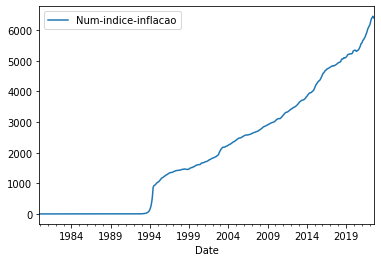

In [49]:
ipca.plot()

Criação de um DataSet apartir dos anos 2012 para fazer o estudo do crescimento da inflação através do IPCA dos últimos 10 anos. Faremos a normalização do índice para compreender o quanto o poder de compra de 1 real se tornou.

In [50]:
ipca2012 = ipca.loc['2012-08-01':]
ipca2012 = ipca2012 / ipca2012.iloc[0]

In [51]:
ipca2012

,Num-indice-inflacao
Date,
2012-08-01 00:00:00-03:00,1.000000
2012-09-01 00:00:00-03:00,1.005700
2012-10-01 00:00:00-03:00,1.011634
2012-11-01 00:00:00-02:00,1.017705
2012-12-01 00:00:00-02:00,1.025746
...,...
2022-04-01 00:00:00-03:00,1.817428
2022-05-01 00:00:00-03:00,1.825970
2022-06-01 00:00:00-03:00,1.838205


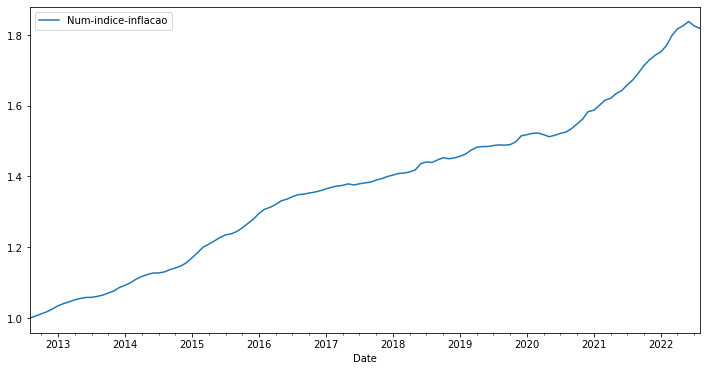

In [52]:
ipca2012.plot(figsize=(12,6))

Imprimindo os valores da variavel ipca2012 e também o seu gráfico, podemos verificar que o poder de compra do brasileiro é corroído com a inflação, de forma que o que antes podoria ser comprado com 1 real, agora custa 1,82 reais. Utilizando mais casas decimais, para realizar o cálculo, verificamos que o crescimento da inflação nestes 10 anos foi de 81,91%

##Carregando dados do Yahoo Finance

In [38]:
lista_acoes = pd.read_csv("https://raw.githubusercontent.com/samirsaraiva/tcc_puc/main/acoes_aleatorias.csv") 
lista_acoes

,FLRY3.SA,MRVE3.SA,ABEV3.SA,AGRO3.SA,B3SA3.SA,BBAS3.SA,OIBR3.SA,BMKS3.SA,BPHA3.SA,ITUB3.SA,...,VALE3.SA,PETR3.SA,RENT3.SA,TOTS3.SA,SANB3.SA,STBP3.SA,SHOW3.SA,DIRR3.SA,TRPL3.SA,ETER3.SA


In [62]:
acoes = web.DataReader('FLRY3.SA,MRVE3.SA,ABEV3.SA,AGRO3.SA,B3SA3.SA,BBAS3.SA,OIBR3.SA,BMKS3.SA,BPHA3.SA,ITUB3.SA,LREN3.SA,JFEN3.SA,CSAB3.SA,GEPA3.SA,MYPK3.SA,LEVE3.SA,QUAL3.SA,MDIA3.SA,MOAR3.SA,ODPV3.SA,RADL3.SA,PSSA3.SA,PRIO3.SA,CSMG3.SA,BRGE3.SA,TUPY3.SA,BRPR3.SA,BRIV3.SA,MILS3.SA,SLCE3.SA,ENBR3.SA,EMBR3.SA,EEEL3.SA,WEGE3.SA,GRND3.SA,VALE3.SA,PETR3.SA,RENT3.SA,TOTS3.SA,SANB3.SA,STBP3.SA,SHOW3.SA,DIRR3.SA,TRPL3.SA,ETER3.SA', data_source='yahoo', start='2012-08-01', end='2022-08-02')['Adj Close']
#interval='1mo'

[*********************100%***********************]  45 of 45 completed


In [63]:
acoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2482 entries, 2012-08-01 00:00:00-03:00 to 2022-08-01 00:00:00-03:00
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ABEV3.SA  2481 non-null   float64
 1   AGRO3.SA  2481 non-null   float64
 2   B3SA3.SA  2481 non-null   float64
 3   BBAS3.SA  2481 non-null   float64
 4   BMKS3.SA  2481 non-null   float64
 5   BPHA3.SA  2481 non-null   float64
 6   BRGE3.SA  2481 non-null   float64
 7   BRIV3.SA  2481 non-null   float64
 8   BRPR3.SA  2481 non-null   float64
 9   CSAB3.SA  2481 non-null   float64
 10  CSMG3.SA  2481 non-null   float64
 11  DIRR3.SA  2481 non-null   float64
 12  EEEL3.SA  2481 non-null   float64
 13  EMBR3.SA  2481 non-null   float64
 14  ENBR3.SA  2481 non-null   float64
 15  ETER3.SA  2481 non-null   float64
 16  FLRY3.SA  2481 non-null   float64
 17  GEPA3.SA  2481 non-null   float64
 18  GRND3.SA  2481 non-null   float64
 19  ITUB3.SA  2481 non-nu

In [55]:
ibov = web.get_data_yahoo('^BVSP', start='2012-08-01', end='2022-09-01', interval='1mo')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [36]:
type(ibov)

pandas.core.series.Series

In [56]:
ibov

Date
2012-08-01 00:00:00-03:00     57061.0
2012-09-01 00:00:00-03:00     59176.0
2012-10-01 00:00:00-03:00     57068.0
2012-11-01 00:00:00-02:00     57475.0
2012-12-01 00:00:00-02:00     60952.0
                               ...   
2022-04-01 00:00:00-03:00    107876.0
2022-05-01 00:00:00-03:00    111351.0
2022-06-01 00:00:00-03:00     98542.0
2022-07-01 00:00:00-03:00    103165.0
2022-08-01 00:00:00-03:00    109523.0
Name: Adj Close, Length: 121, dtype: float64

Para o estudo, faremos a comparação do IPCA com o crescimento do preço de um grupo aleatório de ações. Faremos o mesmo tipo de comparação com o índice do Ibovespa, que é comumente utilizado para estudos do crescimento e melhora do mercado financeiro e da saúde da economia como um todo.

In [57]:
variacao_ibov = ibov.pct_change()
variacao_ibov

Date
2012-08-01 00:00:00-03:00         NaN
2012-09-01 00:00:00-03:00    0.037066
2012-10-01 00:00:00-03:00   -0.035623
2012-11-01 00:00:00-02:00    0.007132
2012-12-01 00:00:00-02:00    0.060496
                               ...   
2022-04-01 00:00:00-03:00   -0.101026
2022-05-01 00:00:00-03:00    0.032213
2022-06-01 00:00:00-03:00   -0.115033
2022-07-01 00:00:00-03:00    0.046914
2022-08-01 00:00:00-03:00    0.061629
Name: Adj Close, Length: 121, dtype: float64

In [58]:
retorno_acumulado_ibov = (1 + variacao_ibov).cumprod()
retorno_acumulado_ibov

Date
2012-08-01 00:00:00-03:00         NaN
2012-09-01 00:00:00-03:00    1.037066
2012-10-01 00:00:00-03:00    1.000123
2012-11-01 00:00:00-02:00    1.007255
2012-12-01 00:00:00-02:00    1.068190
                               ...   
2022-04-01 00:00:00-03:00    1.890538
2022-05-01 00:00:00-03:00    1.951438
2022-06-01 00:00:00-03:00    1.726959
2022-07-01 00:00:00-03:00    1.807977
2022-08-01 00:00:00-03:00    1.919402
Name: Adj Close, Length: 121, dtype: float64

In [59]:
retorno_acumulado_ibov.iloc[0] = 1
retorno_acumulado_ibov

Date
2012-08-01 00:00:00-03:00    1.000000
2012-09-01 00:00:00-03:00    1.037066
2012-10-01 00:00:00-03:00    1.000123
2012-11-01 00:00:00-02:00    1.007255
2012-12-01 00:00:00-02:00    1.068190
                               ...   
2022-04-01 00:00:00-03:00    1.890538
2022-05-01 00:00:00-03:00    1.951438
2022-06-01 00:00:00-03:00    1.726959
2022-07-01 00:00:00-03:00    1.807977
2022-08-01 00:00:00-03:00    1.919402
Name: Adj Close, Length: 121, dtype: float64

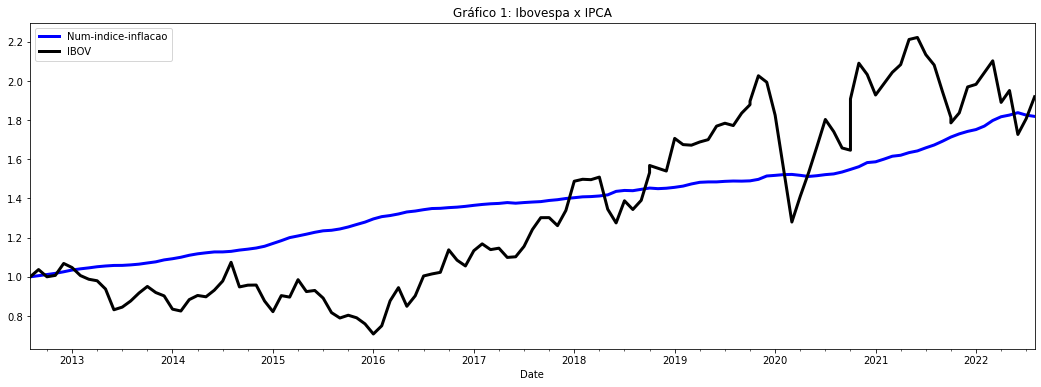

In [60]:
ipca2012.plot(figsize=(18,6), linewidth=3, color='blue', label="Inflação")
retorno_acumulado_ibov.plot(linewidth=3, color='black', label="IBOV")
plt.title('Gráfico 1: Ibovespa x IPCA')
plt.legend()

In [64]:
acoes

,ABEV3.SA,AGRO3.SA,B3SA3.SA,BBAS3.SA,BMKS3.SA,BPHA3.SA,BRGE3.SA,BRIV3.SA,BRPR3.SA,CSAB3.SA,...,RENT3.SA,SANB3.SA,SHOW3.SA,SLCE3.SA,STBP3.SA,TOTS3.SA,TRPL3.SA,TUPY3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-01 00:00:00-03:00,9.006807,5.332036,2.581406,11.576594,149.497681,614.50,3.530582,4.770775,5.836167,14.236073,...,6.811234,4.468867,15.569454,6.117030,0.452511,10.629844,8.641543,17.320591,20.822847,2.258296
2012-08-02 00:00:00-03:00,8.807837,5.276939,2.510562,11.519228,147.497696,609.50,3.530582,4.770775,5.997729,14.236073,...,7.132635,4.468867,15.767013,5.929016,0.452511,10.643848,8.641543,17.248724,20.466427,2.298600
2012-08-03 00:00:00-03:00,8.873692,5.509566,2.647823,12.056334,147.497696,604.50,3.530582,4.770775,6.042470,14.236073,...,7.375287,4.468867,15.814050,5.719819,0.452511,10.484187,8.641543,17.248724,20.772728,2.324249
2012-08-06 00:00:00-03:00,9.009609,5.436106,2.656678,12.426584,147.997696,607.50,3.530582,4.761791,5.940561,14.236073,...,7.481710,4.468867,16.143314,5.770132,0.452511,10.537410,8.641543,17.248724,20.995491,2.351120
2012-08-07 00:00:00-03:00,8.901718,5.338158,2.610188,12.280577,152.997604,597.00,3.530582,4.761791,5.865994,14.236073,...,7.268859,4.766795,16.218575,5.767484,0.452511,11.007978,8.641543,17.421211,20.962078,2.375546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26 00:00:00-03:00,14.820000,23.200001,10.663836,34.912102,240.000000,0.62,6.360000,5.423804,4.186943,50.000000,...,54.627979,13.158118,2.580000,43.400002,5.884577,24.989130,29.600000,21.790001,66.892906,26.162189
2022-07-27 00:00:00-03:00,14.980000,23.809999,10.812911,35.139442,240.000000,0.62,6.360000,5.334727,4.336833,50.000000,...,57.163036,13.118723,2.650000,43.619999,6.190766,26.045290,30.000000,22.270000,67.045013,26.831223
2022-07-28 00:00:00-03:00,15.100000,23.950001,11.190568,35.791821,235.000000,0.62,6.360000,5.453496,4.331837,50.000000,...,57.202801,13.276305,2.710000,43.439999,6.334292,26.284420,29.980000,22.389999,67.206642,27.889692


In [65]:
acoes.dropna(how='all', inplace=True)
#retirando as linhas que possuem somente valores nulos

In [66]:
acoes

,ABEV3.SA,AGRO3.SA,B3SA3.SA,BBAS3.SA,BMKS3.SA,BPHA3.SA,BRGE3.SA,BRIV3.SA,BRPR3.SA,CSAB3.SA,...,RENT3.SA,SANB3.SA,SHOW3.SA,SLCE3.SA,STBP3.SA,TOTS3.SA,TRPL3.SA,TUPY3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-01 00:00:00-03:00,9.006807,5.332036,2.581406,11.576594,149.497681,614.50,3.530582,4.770775,5.836167,14.236073,...,6.811234,4.468867,15.569454,6.117030,0.452511,10.629844,8.641543,17.320591,20.822847,2.258296
2012-08-02 00:00:00-03:00,8.807837,5.276939,2.510562,11.519228,147.497696,609.50,3.530582,4.770775,5.997729,14.236073,...,7.132635,4.468867,15.767013,5.929016,0.452511,10.643848,8.641543,17.248724,20.466427,2.298600
2012-08-03 00:00:00-03:00,8.873692,5.509566,2.647823,12.056334,147.497696,604.50,3.530582,4.770775,6.042470,14.236073,...,7.375287,4.468867,15.814050,5.719819,0.452511,10.484187,8.641543,17.248724,20.772728,2.324249
2012-08-06 00:00:00-03:00,9.009609,5.436106,2.656678,12.426584,147.997696,607.50,3.530582,4.761791,5.940561,14.236073,...,7.481710,4.468867,16.143314,5.770132,0.452511,10.537410,8.641543,17.248724,20.995491,2.351120
2012-08-07 00:00:00-03:00,8.901718,5.338158,2.610188,12.280577,152.997604,597.00,3.530582,4.761791,5.865994,14.236073,...,7.268859,4.766795,16.218575,5.767484,0.452511,11.007978,8.641543,17.421211,20.962078,2.375546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26 00:00:00-03:00,14.820000,23.200001,10.663836,34.912102,240.000000,0.62,6.360000,5.423804,4.186943,50.000000,...,54.627979,13.158118,2.580000,43.400002,5.884577,24.989130,29.600000,21.790001,66.892906,26.162189
2022-07-27 00:00:00-03:00,14.980000,23.809999,10.812911,35.139442,240.000000,0.62,6.360000,5.334727,4.336833,50.000000,...,57.163036,13.118723,2.650000,43.619999,6.190766,26.045290,30.000000,22.270000,67.045013,26.831223
2022-07-28 00:00:00-03:00,15.100000,23.950001,11.190568,35.791821,235.000000,0.62,6.360000,5.453496,4.331837,50.000000,...,57.202801,13.276305,2.710000,43.439999,6.334292,26.284420,29.980000,22.389999,67.206642,27.889692


Ficamos então com exatamente 121 linhas, representando o preço das ações escolhidas apurados mensalmente em 10 anos.

In [67]:
variacao_acoes = acoes.pct_change()
retorno_acumulado_acoes = (1 + variacao_acoes).cumprod()
retorno_acumulado_acoes.iloc[0] = 1
retorno_acumulado_acoes

,ABEV3.SA,AGRO3.SA,B3SA3.SA,BBAS3.SA,BMKS3.SA,BPHA3.SA,BRGE3.SA,BRIV3.SA,BRPR3.SA,CSAB3.SA,...,RENT3.SA,SANB3.SA,SHOW3.SA,SLCE3.SA,STBP3.SA,TOTS3.SA,TRPL3.SA,TUPY3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-01 00:00:00-03:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2012-08-02 00:00:00-03:00,0.977909,0.989667,0.972556,0.995045,0.986622,0.991863,1.000000,1.000000,1.027683,1.000000,...,1.047187,1.000000,1.012689,0.969264,1.000000,1.001317,1.000000,0.995851,0.982883,1.017847
2012-08-03 00:00:00-03:00,0.985221,1.033295,1.025729,1.041441,0.986622,0.983727,1.000000,1.000000,1.035349,1.000000,...,1.082812,1.000000,1.015710,0.935065,1.000000,0.986297,1.000000,0.995851,0.997593,1.029205
2012-08-06 00:00:00-03:00,1.000311,1.019518,1.029159,1.073423,0.989967,0.988609,1.000000,0.998117,1.017887,1.000000,...,1.098437,1.000000,1.036858,0.943290,1.000000,0.991304,1.000000,0.995851,1.008291,1.041103
2012-08-07 00:00:00-03:00,0.988332,1.001148,1.011150,1.060811,1.023411,0.971522,1.000000,0.998117,1.005111,1.000000,...,1.067187,1.066667,1.041692,0.942857,1.000000,1.035573,1.000000,1.005809,1.006686,1.051920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26 00:00:00-03:00,1.645422,4.351059,4.131019,3.015749,1.605376,0.001009,1.801403,1.136881,0.717413,3.512204,...,8.020276,2.944397,0.165709,7.094946,13.004287,2.350846,3.425314,1.258040,3.212476,11.584925
2022-07-27 00:00:00-03:00,1.663186,4.465461,4.188768,3.035387,1.605376,0.001009,1.801403,1.118210,0.743096,3.512204,...,8.392464,2.935581,0.170205,7.130911,13.680932,2.450204,3.471602,1.285753,3.219781,11.881180
2022-07-28 00:00:00-03:00,1.676510,4.491718,4.335067,3.091740,1.571931,0.001009,1.801403,1.143105,0.742240,3.512204,...,8.398302,2.970843,0.174059,7.101485,13.998110,2.472701,3.469288,1.292681,3.227543,12.349883


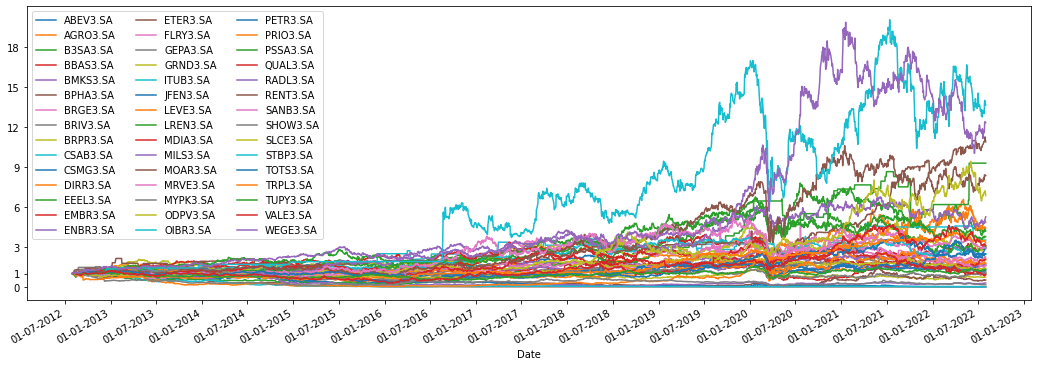

In [68]:
import matplotlib.dates as mdates

ax = retorno_acumulado_acoes.plot(figsize=(18,6))
plt.legend(loc='upper left', ncol=3)
plt.yticks([0,1,3,6,9,12,15,18])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

Aqui estamos fazendo a normalização do preço das ações, assim como fizemos com o índice do IPCA.
Visando facilitar a compreensão do crescimento do valor dos investimentos se tivéssemos aportado em cada uma das ações escolhidas um valor de R$ 1,00

Na sequencia faremos a normalização do índice Ibovespa, assim como fizemos com o IPCA e as ações.

In [69]:
retorno_acumulado_acoes.info()
#retorno_acumulado_ibov.info()
ipca2012.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2481 entries, 2012-08-01 00:00:00-03:00 to 2022-08-01 00:00:00-03:00
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ABEV3.SA  2481 non-null   float64
 1   AGRO3.SA  2481 non-null   float64
 2   B3SA3.SA  2481 non-null   float64
 3   BBAS3.SA  2481 non-null   float64
 4   BMKS3.SA  2481 non-null   float64
 5   BPHA3.SA  2481 non-null   float64
 6   BRGE3.SA  2481 non-null   float64
 7   BRIV3.SA  2481 non-null   float64
 8   BRPR3.SA  2481 non-null   float64
 9   CSAB3.SA  2481 non-null   float64
 10  CSMG3.SA  2481 non-null   float64
 11  DIRR3.SA  2481 non-null   float64
 12  EEEL3.SA  2481 non-null   float64
 13  EMBR3.SA  2481 non-null   float64
 14  ENBR3.SA  2481 non-null   float64
 15  ETER3.SA  2481 non-null   float64
 16  FLRY3.SA  2481 non-null   float64
 17  GEPA3.SA  2481 non-null   float64
 18  GRND3.SA  2481 non-null   float64
 19  ITUB3.SA  2481 non-nu

In [70]:
ipca2012_serie = ipca2012.iloc[:,0]

In [28]:
type(ipca2012_serie)

pandas.core.series.Series

In [71]:
ipca2012_serie

Date
2012-08-01 00:00:00-03:00    1.000000
2012-09-01 00:00:00-03:00    1.005700
2012-10-01 00:00:00-03:00    1.011634
2012-11-01 00:00:00-02:00    1.017705
2012-12-01 00:00:00-02:00    1.025746
                               ...   
2022-04-01 00:00:00-03:00    1.817428
2022-05-01 00:00:00-03:00    1.825970
2022-06-01 00:00:00-03:00    1.838205
2022-07-01 00:00:00-03:00    1.825705
2022-08-01 00:00:00-03:00    1.819134
Name: Num-indice-inflacao, Length: 121, dtype: float64

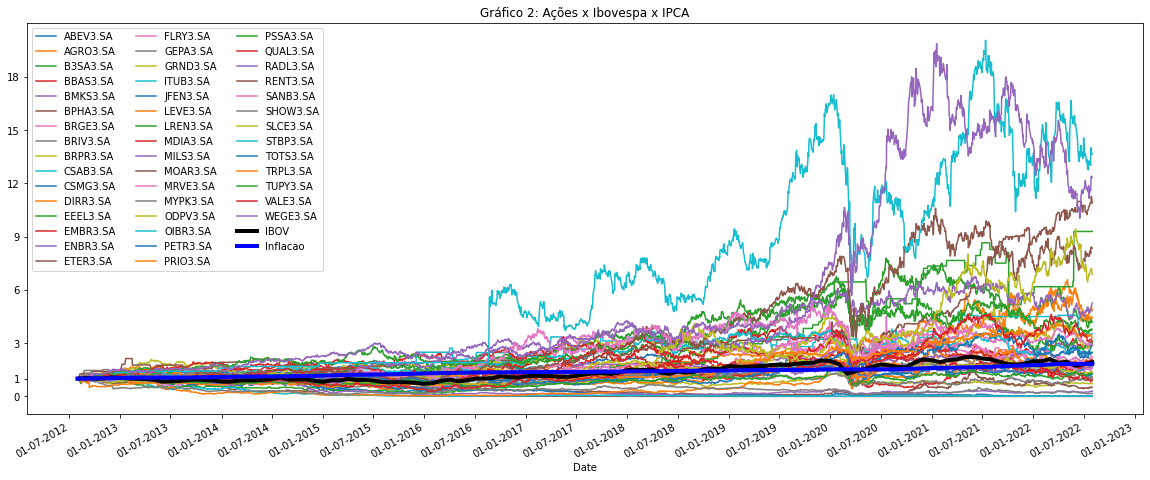

In [72]:
ax2 = retorno_acumulado_acoes.plot(figsize=(20,8))
retorno_acumulado_ibov.plot(linewidth=4, color='black', label="IBOV")
ipca2012_serie.plot(linewidth=4, color='blue', label="Inflacao")
plt.title('Gráfico 2: Ações x Ibovespa x IPCA')
plt.legend(loc='upper left', ncol=3)
plt.yticks([0,1,3,6,9,12,15,18])
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

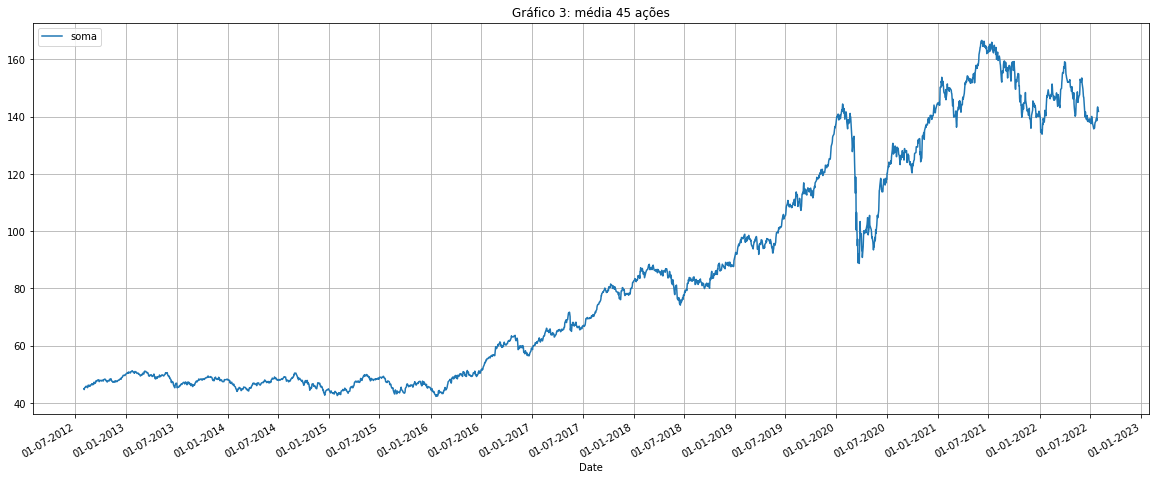

In [73]:
retorno_acoes_medio = retorno_acumulado_acoes
retorno_acoes_medio['soma'] = retorno_acoes_medio.sum(axis=1)
ax3 = retorno_acoes_medio['soma'].plot(figsize=(20,8))
plt.title('Gráfico 3: média 45 ações')
plt.grid()
plt.legend(loc='upper left', ncol=3)
#plt.yticks([0,1,3,6,9,12,15,18])
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

In [74]:
retorno_acoes_medio['media'] = retorno_acoes_medio['soma']/45

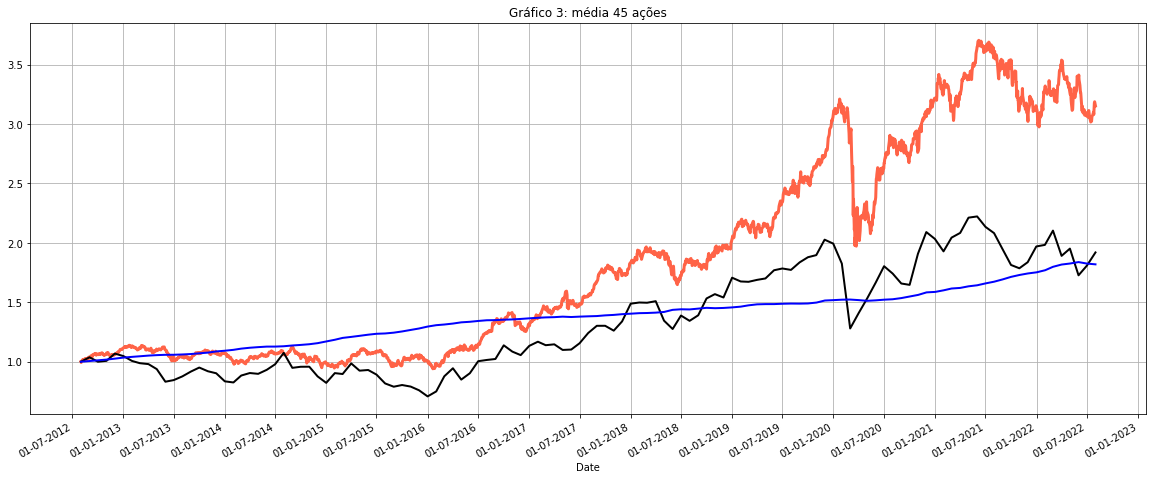

In [76]:
ax4 = retorno_acoes_medio['media'].plot(figsize=(20,8), linewidth=3, color ='tomato')
retorno_acumulado_ibov.plot(linewidth=2, color='black', label="IBOV")
ipca2012_serie.plot(linewidth=2, color='blue', label="Inflacao")
plt.title('Gráfico 3: média 45 ações')
plt.grid()
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

In [77]:
retorno_acumulado_acoes

,ABEV3.SA,AGRO3.SA,B3SA3.SA,BBAS3.SA,BMKS3.SA,BPHA3.SA,BRGE3.SA,BRIV3.SA,BRPR3.SA,CSAB3.SA,...,SHOW3.SA,SLCE3.SA,STBP3.SA,TOTS3.SA,TRPL3.SA,TUPY3.SA,VALE3.SA,WEGE3.SA,soma,media
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-01 00:00:00-03:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,1.000000
2012-08-02 00:00:00-03:00,0.977909,0.989667,0.972556,0.995045,0.986622,0.991863,1.000000,1.000000,1.027683,1.000000,...,1.012689,0.969264,1.000000,1.001317,1.000000,0.995851,0.982883,1.017847,44.698565,0.993301
2012-08-03 00:00:00-03:00,0.985221,1.033295,1.025729,1.041441,0.986622,0.983727,1.000000,1.000000,1.035349,1.000000,...,1.015710,0.935065,1.000000,0.986297,1.000000,0.995851,0.997593,1.029205,45.177872,1.003953
2012-08-06 00:00:00-03:00,1.000311,1.019518,1.029159,1.073423,0.989967,0.988609,1.000000,0.998117,1.017887,1.000000,...,1.036858,0.943290,1.000000,0.991304,1.000000,0.995851,1.008291,1.041103,45.569816,1.012663
2012-08-07 00:00:00-03:00,0.988332,1.001148,1.011150,1.060811,1.023411,0.971522,1.000000,0.998117,1.005111,1.000000,...,1.041692,0.942857,1.000000,1.035573,1.000000,1.005809,1.006686,1.051920,45.559275,1.012428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26 00:00:00-03:00,1.645422,4.351059,4.131019,3.015749,1.605376,0.001009,1.801403,1.136881,0.717413,3.512204,...,0.165709,7.094946,13.004287,2.350846,3.425314,1.258040,3.212476,11.584925,138.618864,3.080419
2022-07-27 00:00:00-03:00,1.663186,4.465461,4.188768,3.035387,1.605376,0.001009,1.801403,1.118210,0.743096,3.512204,...,0.170205,7.130911,13.680932,2.450204,3.471602,1.285753,3.219781,11.881180,141.313072,3.140290
2022-07-28 00:00:00-03:00,1.676510,4.491718,4.335067,3.091740,1.571931,0.001009,1.801403,1.143105,0.742240,3.512204,...,0.174059,7.101485,13.998110,2.472701,3.469288,1.292681,3.227543,12.349883,142.970100,3.177113


In [78]:
retorno_acumulado_acoes.drop(["soma", "media"], axis=1, inplace=True)

In [80]:
vf_acoes = retorno_acumulado_acoes.iloc[2480]
vf_acoes

ABEV3.SA     1.624327
AGRO3.SA     4.405447
B3SA3.SA     4.184918
BBAS3.SA     3.046487
BMKS3.SA     1.633805
BPHA3.SA     0.001009
BRGE3.SA     1.801403
BRIV3.SA     1.099538
BRPR3.SA     0.720838
CSAB3.SA     3.512204
CSMG3.SA     1.259334
DIRR3.SA     2.093478
EEEL3.SA     9.283210
EMBR3.SA     0.986618
ENBR3.SA     2.855623
ETER3.SA     0.513165
FLRY3.SA     2.227515
GEPA3.SA     1.113262
GRND3.SA     2.951532
ITUB3.SA     2.485026
JFEN3.SA     0.016766
LEVE3.SA     1.733159
LREN3.SA     2.966820
MDIA3.SA     2.039883
MILS3.SA     0.293351
MOAR3.SA    10.884619
MRVE3.SA     1.592624
MYPK3.SA     0.988882
ODPV3.SA     1.403439
OIBR3.SA     0.007221
PETR3.SA     2.929774
PRIO3.SA     4.838510
PSSA3.SA     3.767993
QUAL3.SA     0.903302
RADL3.SA     5.255116
RENT3.SA     8.342839
SANB3.SA     2.917950
SHOW3.SA     0.166351
SLCE3.SA     6.849729
STBP3.SA    13.638643
TOTS3.SA     2.455829
TRPL3.SA     3.307280
TUPY3.SA     1.310002
VALE3.SA     3.108377
WEGE3.SA    12.327773
Name: 2022

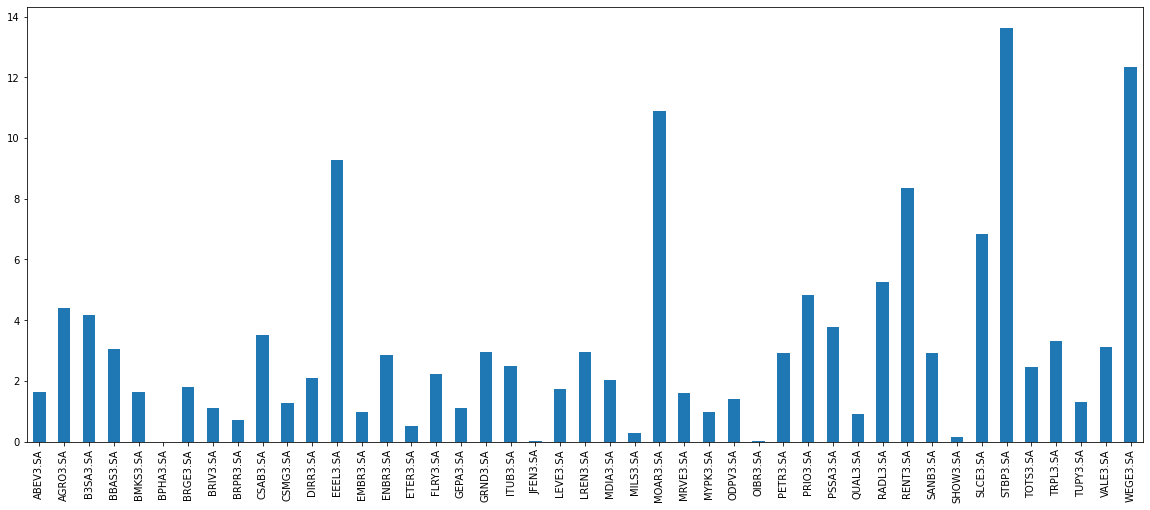

In [81]:
vf_acoes.plot(kind='bar', figsize=(20,8))

In [82]:
ipca2012_serie[120]

1.8191336089566177

Text(0.5, 1.0, 'Gráfico 4: Valorização das Ações em 10 anos x Corte da Inflação')

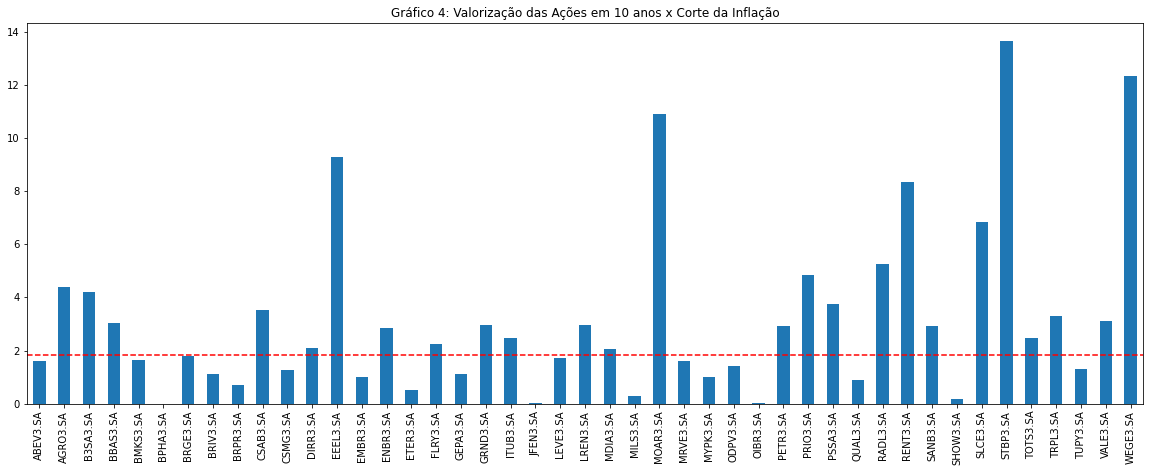

In [83]:
vf_acoes.plot(kind='bar', figsize=(20,7))
plt.axhline(ipca2012_serie[120], 0, 1, color='red', **{'ls':'--'})
plt.title('Gráfico 4: Valorização das Ações em 10 anos x Corte da Inflação')

ABEV3.SA    0.892912
AGRO3.SA    2.421728
B3SA3.SA    2.300501
BBAS3.SA    1.674691
BMKS3.SA    0.898122
BPHA3.SA    0.000555
BRGE3.SA    0.990253
BRIV3.SA    0.604430
BRPR3.SA    0.396253
CSAB3.SA    1.930702
CSMG3.SA    0.692271
DIRR3.SA    1.150810
EEEL3.SA    5.103094
EMBR3.SA    0.542356
ENBR3.SA    1.569771
ETER3.SA    0.282093
FLRY3.SA    1.224492
GEPA3.SA    0.611974
GRND3.SA    1.622493
ITUB3.SA    1.366049
JFEN3.SA    0.009216
LEVE3.SA    0.952739
LREN3.SA    1.630897
MDIA3.SA    1.121349
MILS3.SA    0.161258
MOAR3.SA    5.983408
MRVE3.SA    0.875485
MYPK3.SA    0.543600
ODPV3.SA    0.771488
OIBR3.SA    0.003970
PETR3.SA    1.610533
PRIO3.SA    2.659788
PSSA3.SA    2.071312
QUAL3.SA    0.496556
RADL3.SA    2.888801
RENT3.SA    4.586161
SANB3.SA    1.604033
SHOW3.SA    0.091445
SLCE3.SA    3.765380
STBP3.SA    7.497329
TOTS3.SA    1.349999
TRPL3.SA    1.818052
TUPY3.SA    0.720124
VALE3.SA    1.708713
WEGE3.SA    6.776728
Name: 2022-08-01 00:00:00-03:00, dtype: float64

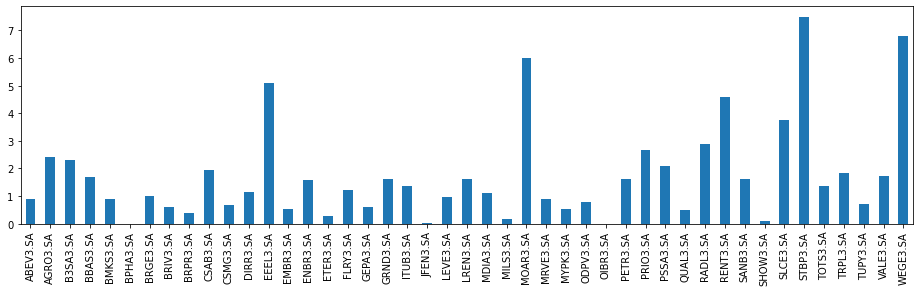

In [84]:
resultado_rel = vf_acoes / ipca2012_serie[120]
resultado_rel.plot(kind='bar', figsize=(16,4))
resultado_rel

In [ ]:
type(resultado_rel)

pandas.core.series.Series

In [85]:
df_resultado_rel = pd.DataFrame(resultado_rel)

In [86]:
df_resultado_rel.columns = ['vl_rel_inflacao']

In [87]:
df_resultado_rel.info()
df_resultado_rel.head()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, ABEV3.SA to WEGE3.SA
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   vl_rel_inflacao  45 non-null     float64
dtypes: float64(1)
memory usage: 1.8+ KB


,vl_rel_inflacao
ABEV3.SA,0.892912
AGRO3.SA,2.421728
B3SA3.SA,2.300501
BBAS3.SA,1.674691
BMKS3.SA,0.898122


In [88]:
ruins = df_resultado_rel.loc[df_resultado_rel['vl_rel_inflacao'] < 1]
boas = df_resultado_rel.loc[df_resultado_rel['vl_rel_inflacao'] > 2]
razoaveis = df_resultado_rel.loc[(df_resultado_rel['vl_rel_inflacao'] >= 1) & (df_resultado_rel['vl_rel_inflacao'] < 2)]

In [89]:
ruins.sort_values('vl_rel_inflacao', inplace=True)
razoaveis.sort_values('vl_rel_inflacao', inplace=True)
boas.sort_values('vl_rel_inflacao', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


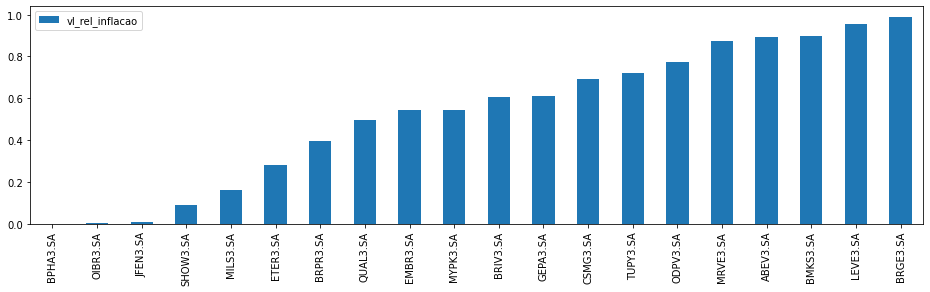

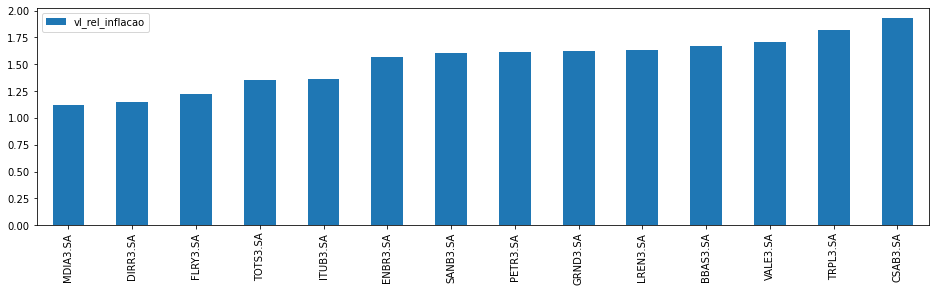

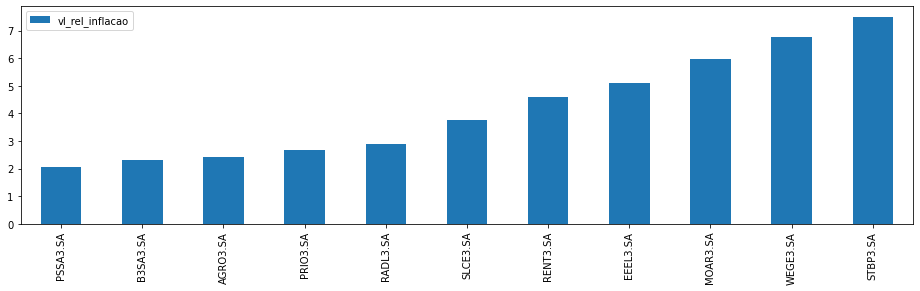

In [90]:
ruins.plot(kind='bar', figsize=(16,4))
razoaveis.plot(kind='bar', figsize=(16,4))
boas.plot(kind='bar', figsize=(16,4))

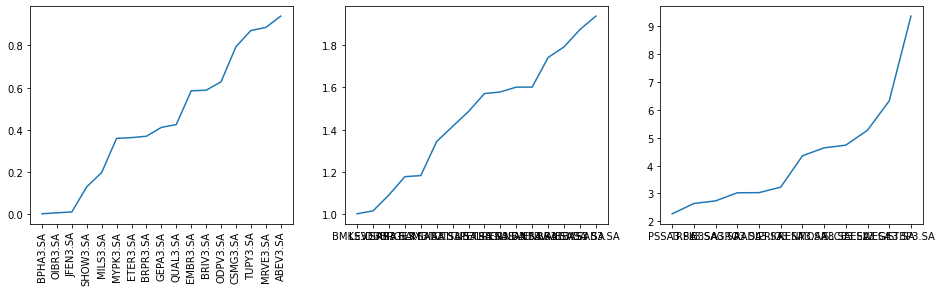

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
plt.xticks(rotation = 90)
#ruins.plot(kind='bar')
plt.plot(ruins)
plt.subplot(1, 3, 2)
plt.plot(razoaveis)
plt.subplot(1, 3, 3)
plt.plot(boas)


In [91]:
ruins.shape[0]

20

In [92]:
razoaveis.shape[0]

14

In [93]:
boas.shape[0]

11

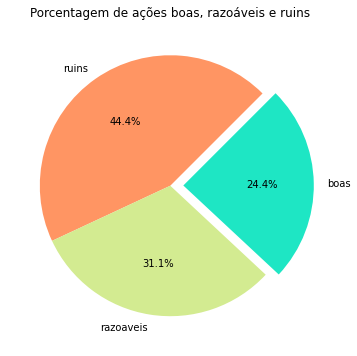

In [277]:
ruins_percent = ruins.shape[0] / (ruins.shape[0]+razoaveis.shape[0]+boas.shape[0])
razoaveis_percent = razoaveis.shape[0] / (ruins.shape[0]+razoaveis.shape[0]+boas.shape[0])
boas_percent = boas.shape[0] / (ruins.shape[0]+razoaveis.shape[0]+boas.shape[0])

pie_labels = ['ruins', 'razoaveis', 'boas']
pie_vals = [ruins_percent, razoaveis_percent, boas_percent]
colors = ["#ff9563", "#d3eb91", "#1ee6c4"]

fig_pie, ax_pie = plt.subplots(figsize=(12,6))

explode = (0, 0, 0.1)

ax_pie.pie(pie_vals, labels=pie_labels, autopct="%.1f%%", explode=explode, startangle=45, colors=colors)
ax_pie.set_title('Porcentagem de ações boas, razoáveis e ruins')

plt.show()


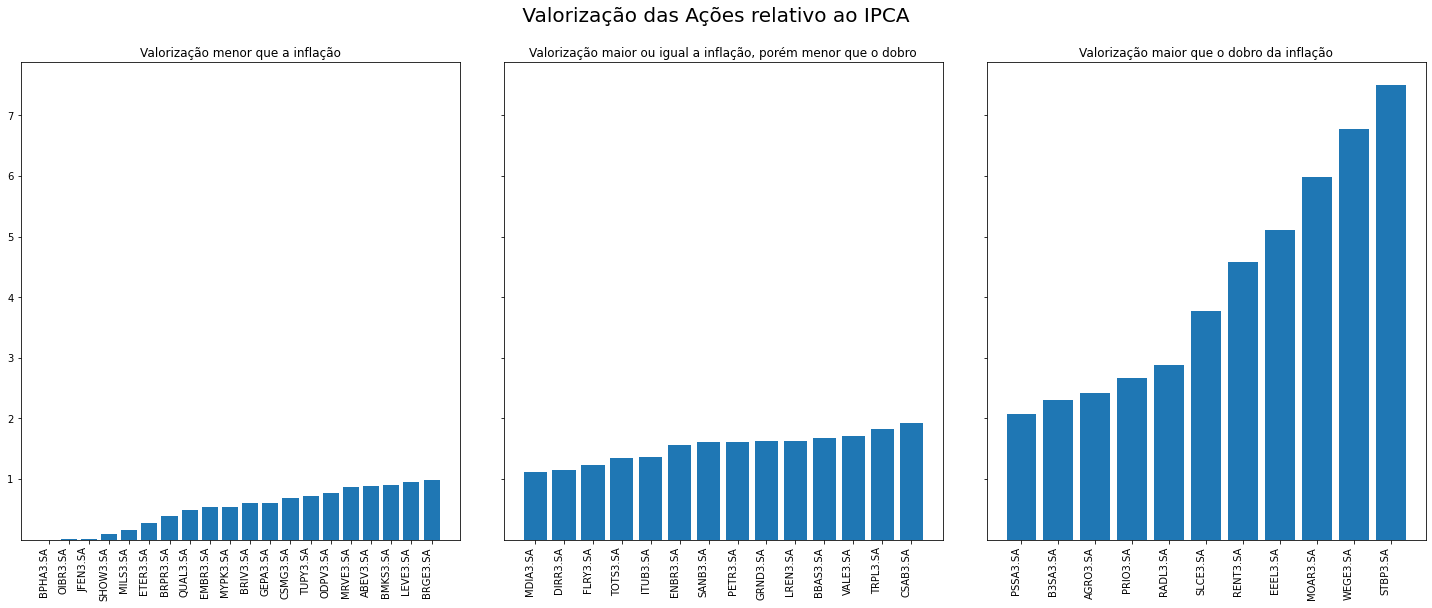

In [99]:
x1 = ruins.index
x2 = razoaveis.index
x3 = boas.index
figure, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20,8))
#plt.xticks(rotation = 90)
figure.autofmt_xdate(rotation=90)


Yticks = np.arange(1, 10, 1) 
plt.yticks(Yticks) 
#plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
axes[0].bar(x1, ruins['vl_rel_inflacao'])
axes[0].set_title('Valorização menor que a inflação')
axes[1].bar(x2, razoaveis['vl_rel_inflacao'])
axes[1].set_title('Valorização maior ou igual a inflação, porém menor que o dobro')
axes[2].bar(x3, boas['vl_rel_inflacao'])
axes[2].set_title('Valorização maior que o dobro da inflação')

#plt.title('Gráfico 4: Valorização das Ações em 10 anos x Corte da Inflação')

figure.suptitle(' Valorização das Ações relativo ao IPCA ', fontsize=20, y=1.05)
figure.tight_layout()

In [126]:
ruins

,vl_rel_inflacao
BPHA3.SA,0.000550
OIBR3.SA,0.005297
JFEN3.SA,0.009876
SHOW3.SA,0.121670
MILS3.SA,0.200700
MYPK3.SA,0.362873
ETER3.SA,0.370581
BRPR3.SA,0.375753
GEPA3.SA,0.414409
QUAL3.SA,0.422976


In [100]:
boas

,vl_rel_inflacao
PSSA3.SA,2.071312
B3SA3.SA,2.300501
AGRO3.SA,2.421728
PRIO3.SA,2.659788
RADL3.SA,2.888801
SLCE3.SA,3.765380
RENT3.SA,4.586161
EEEL3.SA,5.103094
MOAR3.SA,5.983408
WEGE3.SA,6.776728


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [48]:
#dados_financeiros = pd.read_excel('dados_financeiros2.xlsx')
dados_financeiros = pd.read_csv('https://raw.githubusercontent.com/samirsaraiva/tcc_puc/main/dados_financeiros.csv')
dados_financeiros.head()

,Unnamed: 0,AÇÃO,ANO,LPA,P/VP,DIV_LIQ/EBITDA,DIV_LIQ/EBIT,M_LIQUIDA,ROE,ROA,CAGR_LUCRO_5A,BOA
0,0,ABEV3,ATUAL,0.86,2.75,-0.54,-0.72,0.1760,0.1570,0.0991,0.0154,0
1,1,ABEV3,2021,0.80,2.94,-0.69,-0.91,0.1739,0.1533,0.0914,0.0020,0
2,2,ABEV3,2020,0.72,3.34,-0.66,-0.88,0.1949,0.1542,0.0909,-0.0174,0
3,3,ABEV3,2019,0.75,4.79,-0.43,-0.55,0.2240,0.1922,0.1158,-0.0048,0
4,4,ABEV3,2018,0.70,4.30,-0.42,-0.53,0.2189,0.1952,0.1168,0.0284,0


In [50]:
dados_financeiros.drop(["Unnamed: 0"], axis=1, inplace=True)

In [51]:
dados_financeiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AÇÃO            450 non-null    object 
 1   ANO             450 non-null    object 
 2   LPA             450 non-null    float64
 3   P/VP            450 non-null    float64
 4   DIV_LIQ/EBITDA  450 non-null    float64
 5   DIV_LIQ/EBIT    450 non-null    float64
 6   M_LIQUIDA       450 non-null    float64
 7   ROE             450 non-null    float64
 8   ROA             450 non-null    float64
 9   CAGR_LUCRO_5A   450 non-null    float64
 10  BOA             450 non-null    int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 38.8+ KB


In [169]:
X = dados_financeiros[['LPA', 'P/VP', 'DIV_LIQ/EBITDA', 'DIV_LIQ/EBIT', 'M_LIQUIDA', 'ROE', 'ROA', 'CAGR_LUCRO_5A']]
y = dados_financeiros['BOA']

In [194]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [195]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

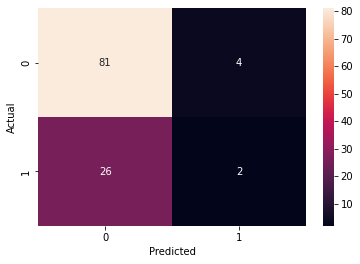

In [196]:
matriz_conf = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(matriz_conf, annot=True)

In [197]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.7345132743362832


In [272]:
previsao_regrelog = logistic_regression.predict([[0.65,1.53,2.48,4.59,5.65,3.60,1.52,0],[-1.85,1.57,0,3.29,-4.43,-25.81,-4.44,0]])
print(previsao_regrelog)

[0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [22]:
from sklearn.naive_bayes import GaussianNB

In [157]:
dados_financeiros = pd.read_excel('dados_financeiros2.xlsx')

In [23]:
X_naive = dados_financeiros[['LPA', 'P/VP', 'DIV_LIQ/EBITDA', 'DIV_LIQ/EBIT', 'M_LIQUIDA', 'ROE', 'ROA', 'CAGR_LUCRO_5A']]
y_naive = dados_financeiros['BOA']

In [24]:
X_train_nb,X_test_nb,y_train_nb,y_test_nb = train_test_split(X_naive,y_naive,test_size=0.25,random_state=0)

In [25]:
nb = GaussianNB()
nb.fit(X_train_nb,y_train_nb)
y_previsa_naive = nb.predict(X_test_nb)

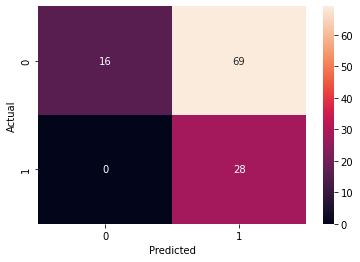

In [26]:
matriz_conf = pd.crosstab(y_test_nb, y_previsa_naive, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(matriz_conf, annot=True)

In [27]:
print('Accuracy: ', metrics.accuracy_score(y_test_nb, y_previsa_naive))
plt.show()

Accuracy:  0.3893805309734513


In [28]:
previsao_naive = nb.predict([[0.65,1.53,2.48,4.59,5.65,3.60,1.52,0],[-1.85,1.57,0,3.29,-4.43,-25.81,-4.44,0]])
print(previsao_naive)

[0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
X_knn = dados_financeiros[['LPA', 'P/VP', 'DIV_LIQ/EBITDA', 'DIV_LIQ/EBIT', 'M_LIQUIDA', 'ROE', 'ROA', 'CAGR_LUCRO_5A']]
y_knn = dados_financeiros['BOA']

In [40]:
X_train_knn,X_test_knn,y_train_knn,y_test_knn = train_test_split(X_knn,y_knn,test_size=0.25,random_state=0)

In [41]:
n_neighbors = 13

In [42]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [43]:
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(n_neighbors=13)

In [44]:
y_pred_knn = knn.predict(X_test_knn)

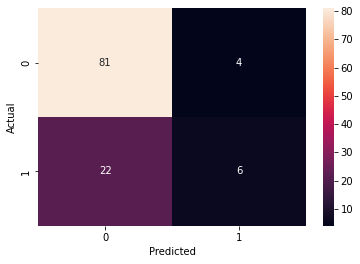

In [45]:
matriz_conf = pd.crosstab(y_test_knn, y_pred_knn, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(matriz_conf, annot=True)

In [46]:
print('Accuracy: ', metrics.accuracy_score(y_test_knn, y_pred_knn))
plt.show()

Accuracy:  0.7699115044247787


In [48]:
previsao_knn = knn.predict([[0.65,1.53,2.48,4.59,5.65,3.60,1.52,0],[-1.85,1.57,0,3.29,-4.43,-25.81,-4.44,0]])
print(previsao_knn)

[0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [21]:
from sklearn import svm

In [6]:
X_svm = dados_financeiros[['LPA', 'P/VP', 'DIV_LIQ/EBITDA', 'DIV_LIQ/EBIT', 'M_LIQUIDA', 'ROE', 'ROA', 'CAGR_LUCRO_5A']]
y_svm = dados_financeiros['BOA']

In [9]:
X_train_svm,X_test_svm,y_train_svm,y_test_svm = train_test_split(X_svm,y_svm,test_size=0.25,random_state=0)

In [22]:
svm = svm.SVC(C=1)

In [23]:
svm.fit(X_train_svm,y_train_svm)

SVC(C=1)

In [24]:
y_pred_svm = svm.predict(X_test_svm)

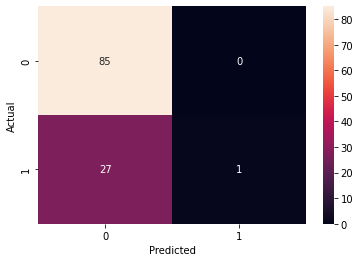

In [25]:
matriz_conf = pd.crosstab(y_test_svm, y_pred_svm, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(matriz_conf, annot=True)

In [26]:
print('Accuracy: ', metrics.accuracy_score(y_test_svm, y_pred_svm))
plt.show()

Accuracy:  0.7610619469026548


In [27]:
previsao_svm = svm.predict([[0.65,1.53,2.48,4.59,5.65,3.60,1.52,0],[-1.85,1.57,0,3.29,-4.43,-25.81,-4.44,0]])
print(previsao_svm)

[0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Testar modelo para a empresa ENGIE que teve uma performance muito boa nos últimos 10 anos. Comparado ao valor da inflação, ela teve um crescimento x vezes maior

In [28]:
acoesTeste = web.DataReader('BEEF3.SA SMTO3.SA ', data_source='yahoo', start='2012-08-01', end='2022-08-02', interval='3mo')['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [29]:
acoesTeste.dropna(how='all', inplace=True)
variacao_acoesTeste = acoesTeste.pct_change()
retorno_acumulado_acoesTeste = (1 + variacao_acoesTeste).cumprod()
retorno_acumulado_acoesTeste.iloc[0] = 1
retorno_acumulado_acoesTeste

,BEEF3.SA,SMTO3.SA
Date,,
2012-08-01 00:00:00-03:00,1.000000,1.000000
2012-11-01 00:00:00-02:00,1.181818,1.122931
2013-02-01 00:00:00-02:00,1.036364,1.115051
2013-05-01 00:00:00-03:00,0.827273,0.965327
2013-08-01 00:00:00-03:00,0.856364,1.245075
2013-11-01 00:00:00-02:00,0.998182,0.985536
2014-02-01 00:00:00-02:00,0.910909,1.330513
2014-05-01 00:00:00-03:00,1.049091,1.498620
2014-08-01 00:00:00-03:00,1.159091,1.553593
